In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import os, warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from datetime import datetime, timedelta
from itertools import chain
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing
from lightgbm import LGBMRegressor
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=700))



ImportError: ignored

In [72]:
df1=pd.read_csv('/content/drive/MyDrive/Time Series Forecasting/CarRegb.csv')
                  
df=pd.read_csv('/content/drive/MyDrive/Time Series Forecasting/CarReg.csv')
                
df.head()

#df1.head()

,Time,Reg Car Numbers
0,1995M01,10817
1,1995M02,8916
2,1995M03,9697
3,1995M04,10314
4,1995M05,9775


In [73]:
# summary statistics1
df.describe()

,Reg Car Numbers
count,324.000000
mean,10494.172840
std,7180.582829
min,474.000000
25%,4313.500000
50%,9332.500000
75%,15369.750000
max,32961.000000


In [74]:
# shape
df1.shape

(324, 2)

In [75]:
# shape
df.shape

(324, 2)

In [76]:
# data types
df1.dtypes

Time     object
Sales     int64
dtype: object

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    324 non-null    object
 1   Sales   324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [78]:
print("There are {:,} rows and {} columns in the  Registered Car dataset set.".format(df.shape[0], df.shape[1]))
print("The time series starts on {} and ends on {}.\n".format(df.Time.min(), df.Time.max()))
print("There are {:,} rows and {} columns in the Custom Default data set.".format(df1.shape[0], df1.shape[1]))



There are 324 rows and 2 columns in the  Registered Car dataset set.
The time series starts on 1995M01 and ends on 2021m02.

There are 324 rows and 2 columns in the Custom Default data set.


In [79]:
# Changing the datatype

df1["Time"] = df1["Time"].astype("datetime64")

In [80]:
df1.head()

,Time,Sales
0,1995-01-01,10817
1,1995-02-01,8916
2,1995-03-01,9697
3,1995-04-01,10314
4,1995-05-01,9775


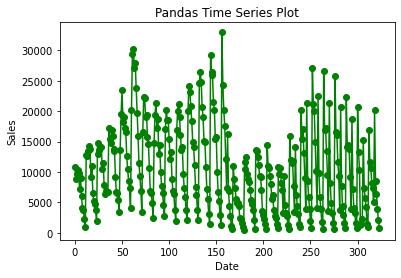

In [81]:
# Import Library

import matplotlib.pyplot as plt

# Plot

plt.plot(df1["Sales"], marker='o',color = 'green')

# Labelling 
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Pandas Time Series Plot")

# Display

plt.show()

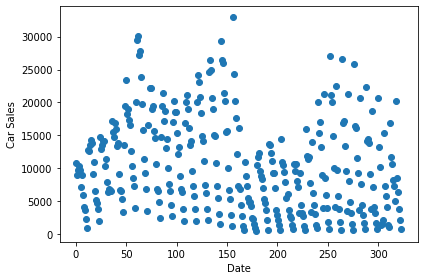

In [82]:
from matplotlib.colors import ListedColormap
#discrete color scheme
cMap = ListedColormap(['white', 'green', 'blue','red'])
# Plot scatter

plt.scatter(df1.index, df1["Sales"])

# Labelling 

plt.xlabel("Date")
plt.ylabel("Car Sales")

# Auto space

plt.tight_layout()

# Display


plt.show()

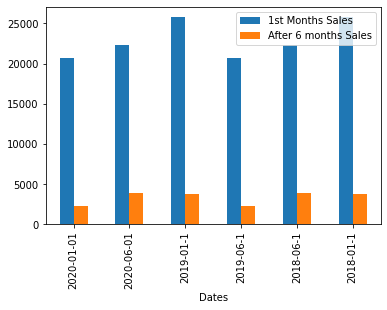

In [83]:
# Import Libraries


import matplotlib.pyplot as plt
  
# Creating dataframe


df = pd.DataFrame({
     'Dates':['2020-01-01', '2020-06-01',
             '2019-01-1', '2019-06-1',
             '2018-06-1', '2018-01-1'],
    '1st Months Sales': [20665, 22279, 25813,20665, 22279, 25813],
    'After 6 months Sales': [2189, 3858, 3716,2189, 3858, 3716]
})
  
# Plotting graph


df.plot(x="Dates", y=["1st Months Sales", "After 6 months Sales"], kind="bar")

# Show

plt.show()

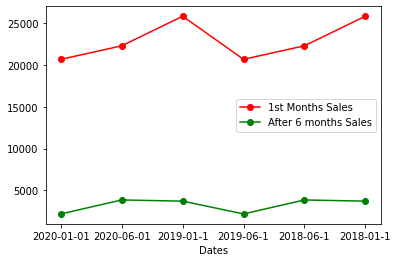

In [84]:
# Import Libraries


import matplotlib.pyplot as plt
  
# Creating dataframe


df = pd.DataFrame({
     'Dates':['2020-01-01', '2020-06-01',
             '2019-01-1', '2019-06-1',
             '2018-06-1', '2018-01-1'],
    '1st Months Sales': [20665, 22279, 25813,20665, 22279, 25813],
    'After 6 months Sales': [2189, 3858, 3716,2189, 3858, 3716]
})
  
# Plotting graph



df.plot(x="Dates", y=["1st Months Sales", "After 6 months Sales"], marker='o',color ='RGB')

# Show

plt.show()

In [86]:
df1.head

<bound method NDFrame.head of           Time  Sales
0   1995-01-01  10817
1   1995-02-01   8916
2   1995-03-01   9697
3   1995-04-01  10314
4   1995-05-01   9775
..         ...    ...
319 2021-08-01   8563
320 2021-09-01   6354
321 2021-10-01   3882
322 2021-11-01   2167
323 2021-12-01    832

[324 rows x 2 columns]>

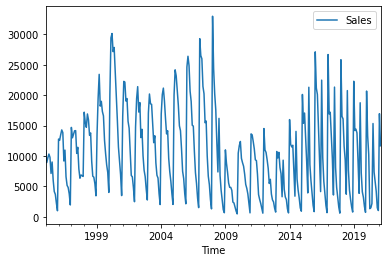

In [88]:
df1 = df1.loc[(df1.Time >= '1995-01') & (df1.Time <= '2021-02')]
df1.set_index('Time').plot()


In [89]:

cat=df1.select_dtypes(include=['object']).columns.tolist()
for i in cat[:1]:
    obs=df1[i].value_counts()
    avg_congest=df1.groupby(i)['Sales'].mean()
    df=pd.DataFrame({"Number of Observations":obs, 
                     "Average Congestion":avg_congest})
    df.index.rename('Direction', inplace=True)
    display(df.sort_values(by="Average Congestion", ascending=False)
            .style.background_gradient(cmap='cividis',subset=['Average Congestion'], vmin=20, vmax=54)
            .format({"Number of Observations": "{:,.0f}", "Average Congestion": "{:.1f}"})
            .set_caption("Summary statistics of categorical columns"))

In [ ]:
hist_data=df1['Sales']
density=gaussian_kde(dataset=hist_data, bw_method='silverman')
x=np.arange(0,100) 
density.covariance_factor = lambda: .14  
density._compute_covariance()
kde_curve=density(x)

fig = go.Figure()
fig.add_trace(go.Histogram(x=hist_data, histnorm='probability density', marker_color='#F4F4F4'))
fig.add_trace(go.Scatter(x=x, y=kde_curve, marker_color='#6168CE', fill='tozeroy'))
fig.update_traces(marker=dict(line=dict(width=1, color='#BDC3C7')), 
                  hovertemplate='%{y}<extra></extra>')
fig.update_layout(template=temp, title="Distribution of Congestion", 
                  xaxis_title="Congestion", yaxis_title="Probability Densities", showlegend=False)
fig.show()



# ETS model

In [92]:

%matplotlib inline
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

Text(0, 0.5, 'Annual Car Sales production in Dhaka (Mt)')

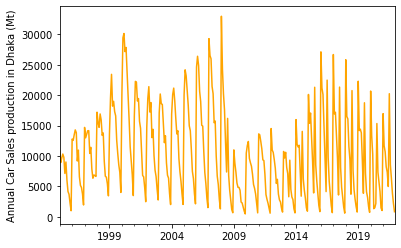

In [121]:
sales_data =[
10817,
8916,
9697,
10314,
9775,
7125,
9007,
6000,
4155,
3692,
2236,
996,
12773,
12562,
13479,
14280,
13839,
9168,
10959,
6582,
5162,
4815,
3768,
1946,
14691,
12982,
13545,
14131,
14162,
10415,
11420,
7870,
6340,
6869,
6777,
6637,
17192,
15480,
14703,
16903,
15921,
13381,
13779,
9127,
6676,
6511,
5419,
3447,
13578,
19470,
23411,
18190,
18979,
17296,
16588,
12561,
10405,
8537,
7304,
4003,
20100,
29419,
30125,
27147,
27832,
23874,
19728,
15847,
11477,
9301,
6933,
3486,
16528,
22258,
22146,
19027,
19436,
15688,
14558,
10609,
6799,
6563,
4816,
2480,
14724,
19424,
21391,
17215,
18775,
13017,
14385,
10044,
7649,
6598,
4497,
2766,
17051,
20182,
18564,
18484,
15365,
12180,
13313,
8859,
6830,
6371,
3781,
2012,
16875,
20084,
21150,
19057,
16153,
13619,
14144,
9599,
7390,
5830,
3763,
2033,
20002,
24153,
23160,
20864,
18331,
14950,
14149,
11086,
7475,
6290,
3779,
2134,
24605,
26384,
24858,
20634,
18951,
15048,
14905,
10749,
7259,
5479,
3074,
1509,
29281,
26495,
25974,
21427,
20232,
15465,
15738,
10006,
6674,
5301,
2857,
1304,
32961,
24290,
20190,
17587,
12172,
7369,
16175,
6822,
4364,
2699,
1174,
667,
10996,
8793,
7345,
5558,
4840,
4833,
4355,
2422,
2272,
1596,
948,
474,
10469,
11707,
12379,
9599,
8893,
8314,
7018,
5310,
4683,
3742,
2146,
647,
13624,
13470,
12390,
11171,
9359,
9240,
6953,
3653,
2861,
2216,
1398,
597,
14507,
10993,
10581,
9388,
7986,
5481,
6164,
3736,
2783,
2442,
1421,
774,
10735,
9671,
10596,
8113,
7095,
3293,
9306,
4504,
3257,
2832,
1307,
639,
15975,
11906,
11485,
11757,
7767,
3390,
14037,
6201,
4376,
3082,
1465,
920,
20105,
15384,
17054,
13166,
9027,
3924,
21290,
8572,
5924,
3943,
1874,
847,
27106,
21173,
20096,
14847,
10125,
4143,
22462,
9781,
5842,
3831,
1846,
679,
26668,
16905,
17180,
13427,
9581,
3585,
21316,
8105,
4828,
3255,
1594,
601,
25813,
16501,
16088,
11557,
9362,
3716,
20743,
7681,
4397,
2874,
1647,
778,
22279,
14178,
14404,
13794,
9126,
3858,
18741,
7202,
4104,
3214,
1676,
729,
20665,
13263,
10239,
1338,
1490,
2189,
15329,
7360,
5747,
4189,
1468,
1032,
16948,
11672,
10672,
8214,
7337,
4980,
20232,
8563,
6354,
3882,
2167,
832]
index = pd.date_range("1995-01-01", "2021-12-01", freq="1MS")
sale= pd.Series(sales_data, index=index)
sale.plot(color = 'Orange')
plt.ylabel("Annual Car Sales production in Dhaka (Mt)")

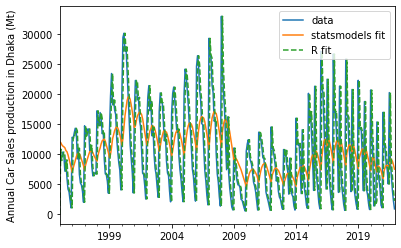

In [122]:
model = ETSModel(sale)
fit = model.fit(maxiter=10000)
sale.plot(label="data")
fit.fittedvalues.plot(label="statsmodels fit")
plt.ylabel("Annual Car Sales production in Dhaka (Mt)")

# obtained from R
params_R = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
yhat = model.smooth(params_R).fittedvalues
yhat.plot(label="R fit", linestyle="--")

plt.legend()

#Heuristic Model

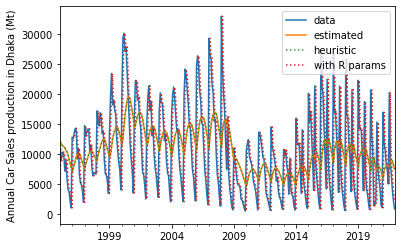

In [123]:
model_heuristic = ETSModel(sale, initialization_method="heuristic")
fit_heuristic = model_heuristic.fit()
sale.plot(label="data")
fit.fittedvalues.plot(label="estimated")
fit_heuristic.fittedvalues.plot(label="heuristic", linestyle="dotted")
plt.ylabel("Annual Car Sales production in Dhaka (Mt)")

# obtained from R
params = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
yhat = model.smooth(params).fittedvalues
yhat.plot(label="with R params", linestyle=":")

plt.legend()

In [124]:
print(fit.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  324
Model:                       ETS(ANN)   Log Likelihood               -3318.222
Date:                Mon, 23 May 2022   AIC                           6642.444
Time:                        15:17:11   BIC                           6653.786
Sample:                    01-01-1995   HQIC                          6646.971
                         - 12-01-2021   Scale                     46037829.854
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.1193      0.055      2.186      0.029       0.012       0.226
initial_level    1.203e+04   3519.165      3.419      0.001    5135.963    1.89e+04
Ljung-Box (Q):                  

In [125]:
print(fit_heuristic.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  324
Model:                       ETS(ANN)   Log Likelihood               -3318.222
Date:                Mon, 23 May 2022   AIC                           6640.444
Time:                        15:17:14   BIC                           6648.005
Sample:                    01-01-1995   HQIC                          6643.462
                         - 12-01-2021   Scale                     46037829.855
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.1193      0.050      2.386      0.017       0.021       0.217
              initialization method: heuristic
----------------------------------------------
initial_level         

In [127]:
pred = fit.get_prediction(start="1995", end="2021")

In [128]:
df = pred.summary_frame(alpha=0.05)
df

,mean,pi_lower,pi_upper
1995-01-01,12033.399994,-1265.187434,25331.987422
1995-02-01,11888.303975,-1410.283453,25186.891403
1995-03-01,11533.758202,-1764.829226,24832.345630
1995-04-01,11314.663902,-1983.923526,24613.251330
1995-05-01,11195.301563,-2103.285865,24493.888991
...,...,...,...
2021-08-01,9152.915626,-4145.671802,22451.503054
2021-09-01,9082.548634,-4216.038794,22381.136062
2021-10-01,8757.078765,-4541.508663,22055.666193
2021-11-01,8175.564026,-5123.023402,21474.151454


In [138]:
simulated = fit.simulate(anchor="end", nsimulations=28, repetitions=100)

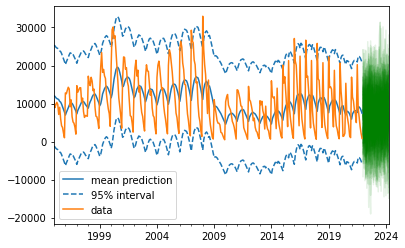

In [140]:
for i in range(simulated.shape[1]):
    simulated.iloc[:, i].plot(label="_", color="Green", alpha=0.1)
df["mean"].plot(label="mean prediction")
df["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
df["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
pred.endog.plot(label="data")
plt.legend()

# ARIMA & SARIMA


In [4]:
%matplotlib inline
import numpy as np

In [5]:
rng = np.random.default_rng(20210819)
eta = rng.standard_normal(5200)
rho = 0.8
beta = 10
epsilon = eta.copy()
for i in range(1, eta.shape[0]):
    epsilon[i] = rho * epsilon[i - 1] + eta[i]
y = beta + epsilon
y = y[200:]

In [ ]:
from statsmodels.tsa.api import SARIMAX, AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [144]:
ar0_res = SARIMAX(y, order=(0, 0, 0), trend="c").fit()
sarimax_res = SARIMAX(y, order=(1, 0, 0), trend="c").fit()
arima_res = ARIMA(y, order=(1, 0, 0), trend="c").fit()
autoreg_res = AutoReg(y, 1, trend="c").fit()

In [145]:
full_x = rng.standard_normal(eta.shape)
x = full_x[200:]
y += 3 * x

In [146]:
sarimax_exog_res = SARIMAX(y, exog=x, order=(2,1,1), trend="c").fit()
arima_exog_res = ARIMA(y, exog=x, order=(2,1,1), trend="c").fit()

In [ ]:
def print_params(s):
    from io import StringIO

    return pd.read_csv(StringIO(s.tables[1].as_csv()), index_col=0)


print_params(arima_exog_res.summary())

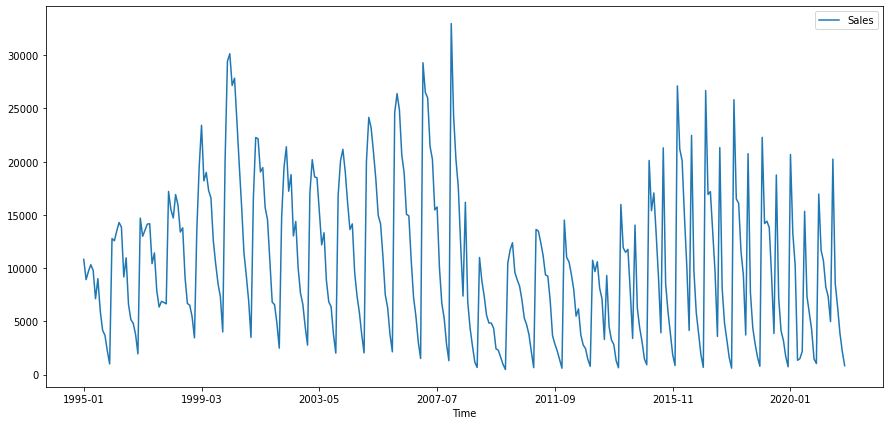

In [149]:
df=pd.read_csv('/content/drive/MyDrive/Time Series Forecasting/CarRegb.csv')
df.head()

# Updating the header
df.columns=["Time","Sales"]
df.head()
df.describe()
df.set_index('Time',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [150]:
from statsmodels.tsa.stattools import adfuller

In [151]:
test_result=adfuller(df['Sales'])

In [158]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    

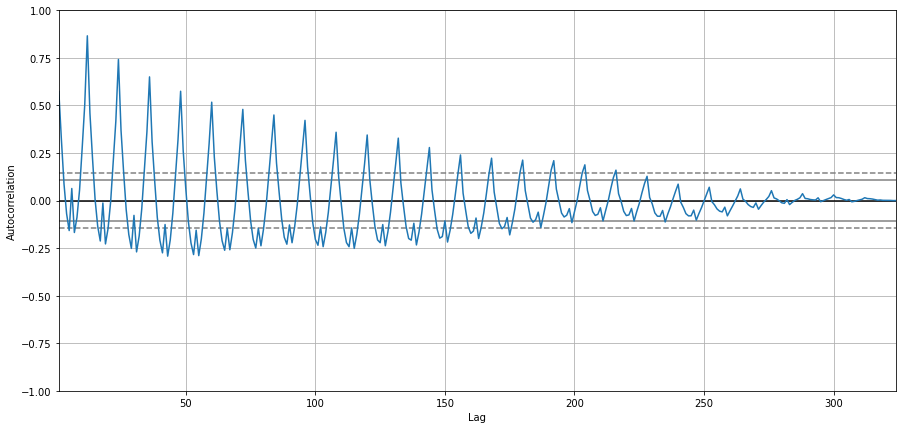

In [159]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [167]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

In [168]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

count      324.000000
mean     10494.172840
std       7180.582829
min        474.000000
25%       4313.500000
50%       9332.500000
75%      15369.750000
max      32961.000000
dtype: float64

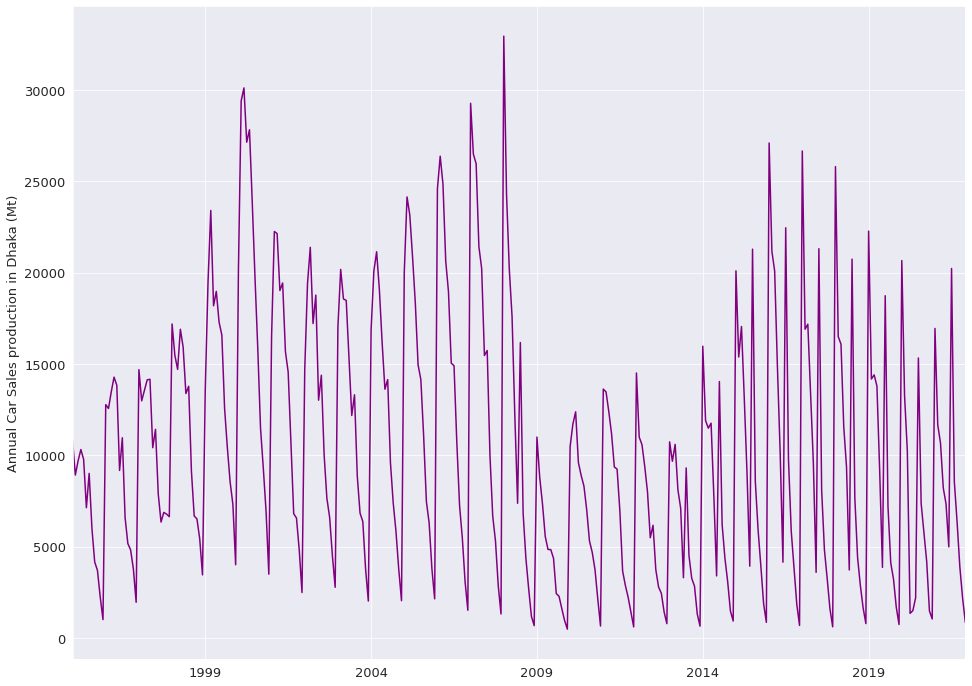

In [170]:
 sales_data =[
10817,
8916,
9697,
10314,
9775,
7125,
9007,
6000,
4155,
3692,
2236,
996,
12773,
12562,
13479,
14280,
13839,
9168,
10959,
6582,
5162,
4815,
3768,
1946,
14691,
12982,
13545,
14131,
14162,
10415,
11420,
7870,
6340,
6869,
6777,
6637,
17192,
15480,
14703,
16903,
15921,
13381,
13779,
9127,
6676,
6511,
5419,
3447,
13578,
19470,
23411,
18190,
18979,
17296,
16588,
12561,
10405,
8537,
7304,
4003,
20100,
29419,
30125,
27147,
27832,
23874,
19728,
15847,
11477,
9301,
6933,
3486,
16528,
22258,
22146,
19027,
19436,
15688,
14558,
10609,
6799,
6563,
4816,
2480,
14724,
19424,
21391,
17215,
18775,
13017,
14385,
10044,
7649,
6598,
4497,
2766,
17051,
20182,
18564,
18484,
15365,
12180,
13313,
8859,
6830,
6371,
3781,
2012,
16875,
20084,
21150,
19057,
16153,
13619,
14144,
9599,
7390,
5830,
3763,
2033,
20002,
24153,
23160,
20864,
18331,
14950,
14149,
11086,
7475,
6290,
3779,
2134,
24605,
26384,
24858,
20634,
18951,
15048,
14905,
10749,
7259,
5479,
3074,
1509,
29281,
26495,
25974,
21427,
20232,
15465,
15738,
10006,
6674,
5301,
2857,
1304,
32961,
24290,
20190,
17587,
12172,
7369,
16175,
6822,
4364,
2699,
1174,
667,
10996,
8793,
7345,
5558,
4840,
4833,
4355,
2422,
2272,
1596,
948,
474,
10469,
11707,
12379,
9599,
8893,
8314,
7018,
5310,
4683,
3742,
2146,
647,
13624,
13470,
12390,
11171,
9359,
9240,
6953,
3653,
2861,
2216,
1398,
597,
14507,
10993,
10581,
9388,
7986,
5481,
6164,
3736,
2783,
2442,
1421,
774,
10735,
9671,
10596,
8113,
7095,
3293,
9306,
4504,
3257,
2832,
1307,
639,
15975,
11906,
11485,
11757,
7767,
3390,
14037,
6201,
4376,
3082,
1465,
920,
20105,
15384,
17054,
13166,
9027,
3924,
21290,
8572,
5924,
3943,
1874,
847,
27106,
21173,
20096,
14847,
10125,
4143,
22462,
9781,
5842,
3831,
1846,
679,
26668,
16905,
17180,
13427,
9581,
3585,
21316,
8105,
4828,
3255,
1594,
601,
25813,
16501,
16088,
11557,
9362,
3716,
20743,
7681,
4397,
2874,
1647,
778,
22279,
14178,
14404,
13794,
9126,
3858,
18741,
7202,
4104,
3214,
1676,
729,
20665,
13263,
10239,
1338,
1490,
2189,
15329,
7360,
5747,
4189,
1468,
1032,
16948,
11672,
10672,
8214,
7337,
4980,
20232,
8563,
6354,
3882,
2167,
832]
index = pd.date_range("1995-01-01", "2021-12-01", freq="1MS")
sale= pd.Series(sales_data, index=index)
sale.plot(color = 'purple')
plt.ylabel("Annual Car Sales production in Dhaka (Mt)")
 
 
 

sale.describe()

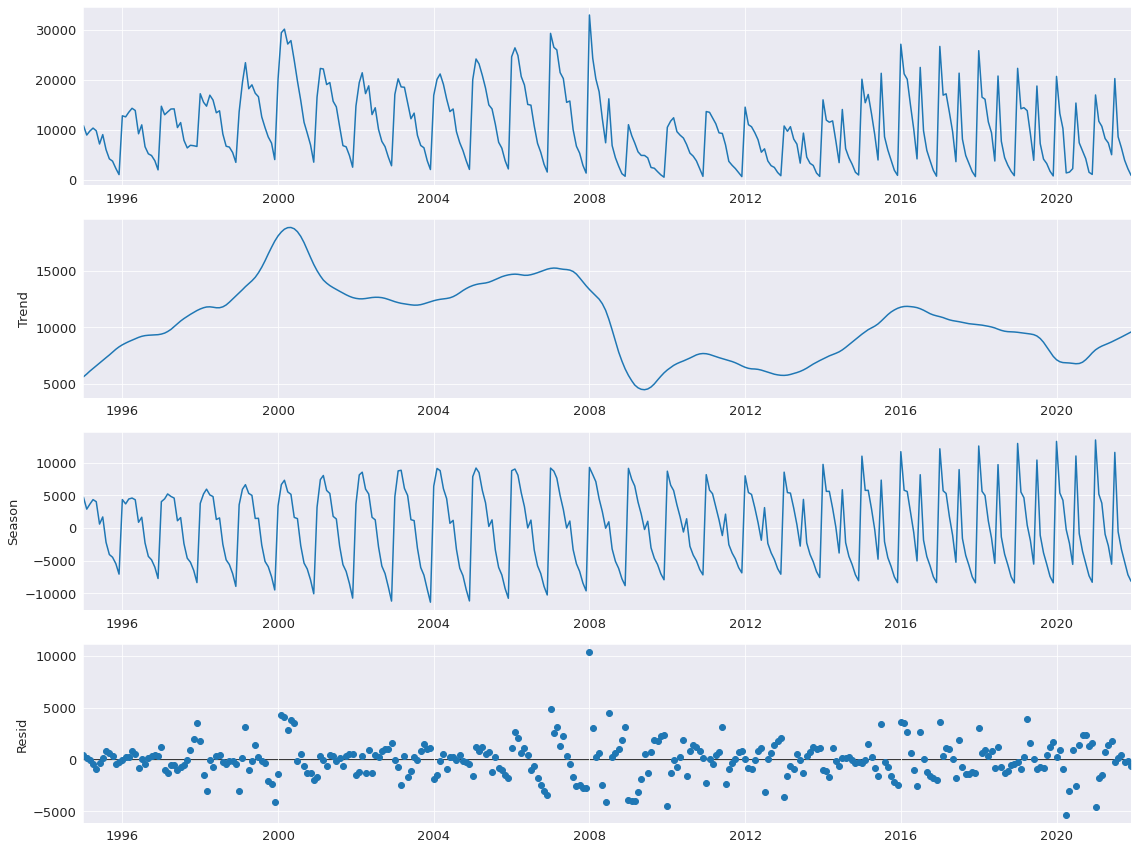

In [173]:
from statsmodels.tsa.seasonal import STL

stl = STL(sale, seasonal=13)
res = stl.fit()
fig = res.plot()

In [177]:
from statsmodels.datasets import elec_equip as ds

elec_equip = ds.load().data

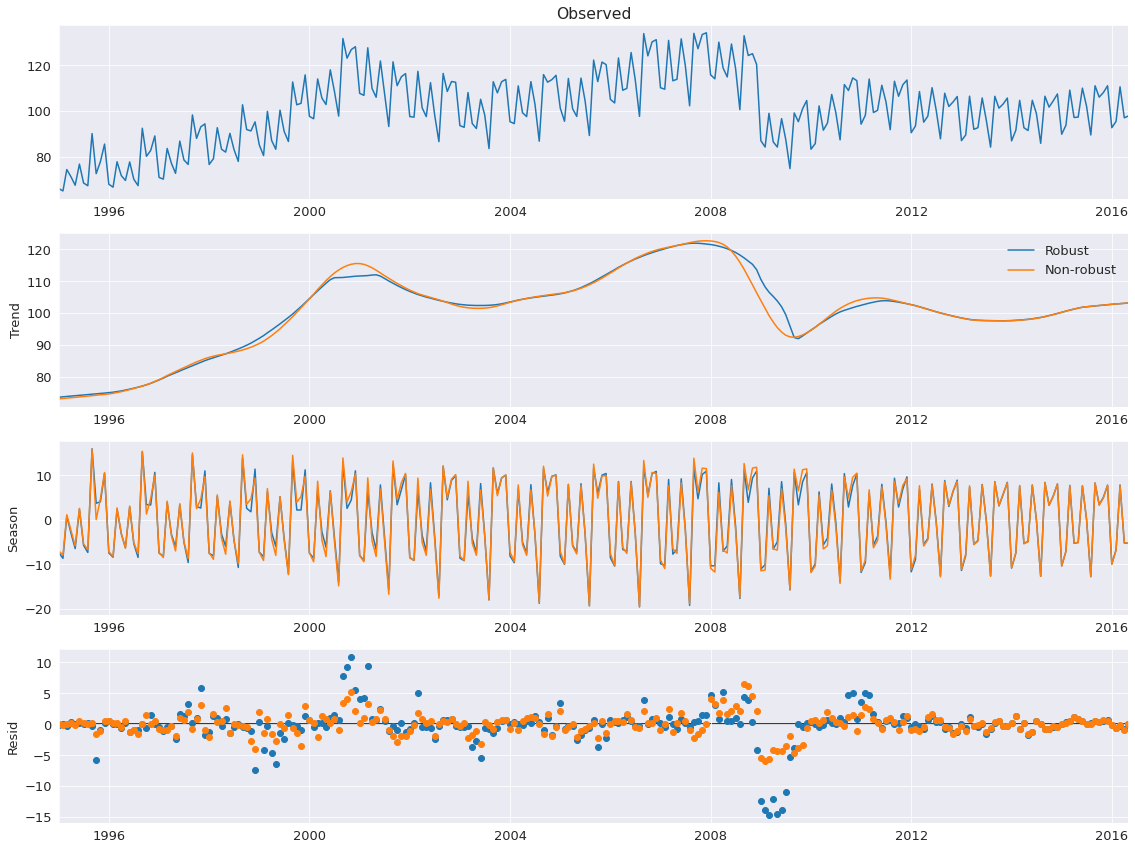

In [178]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)


stl = STL(elec_equip, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(elec_equip, period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

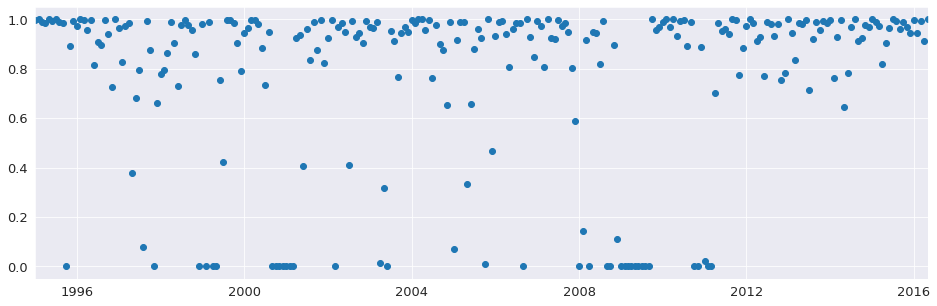

In [182]:
fig = plt.figure(figsize=(16, 5))
lines = plt.plot(res_robust.weights, marker="o", linestyle="none")
ax = plt.gca()
xlim = ax.set_xlim(elec_equip.index[0], elec_equip.index[-1])

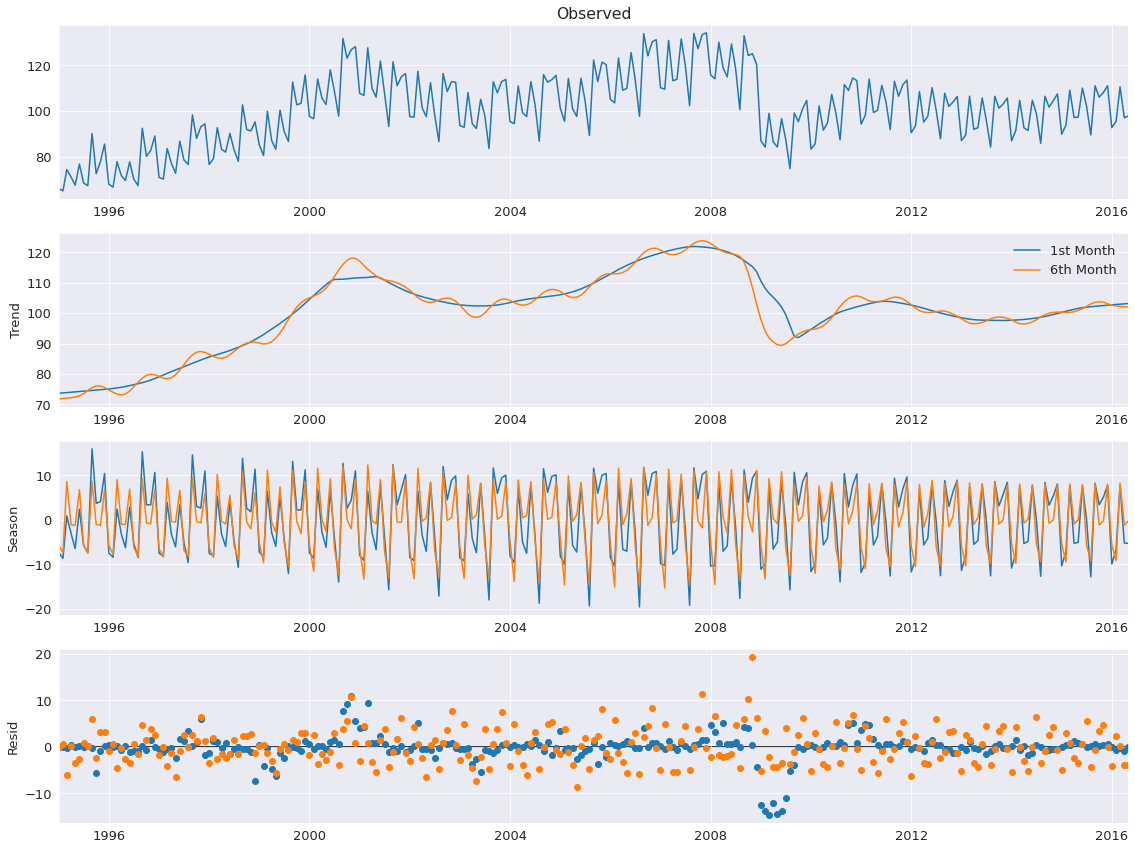

In [184]:
stl = STL(
    elec_equip, period=6, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True
)
res_deg_0 = stl.fit()
fig = res_robust.plot()
add_stl_plot(fig, res_deg_0, ["1st Month", "6th Month"])

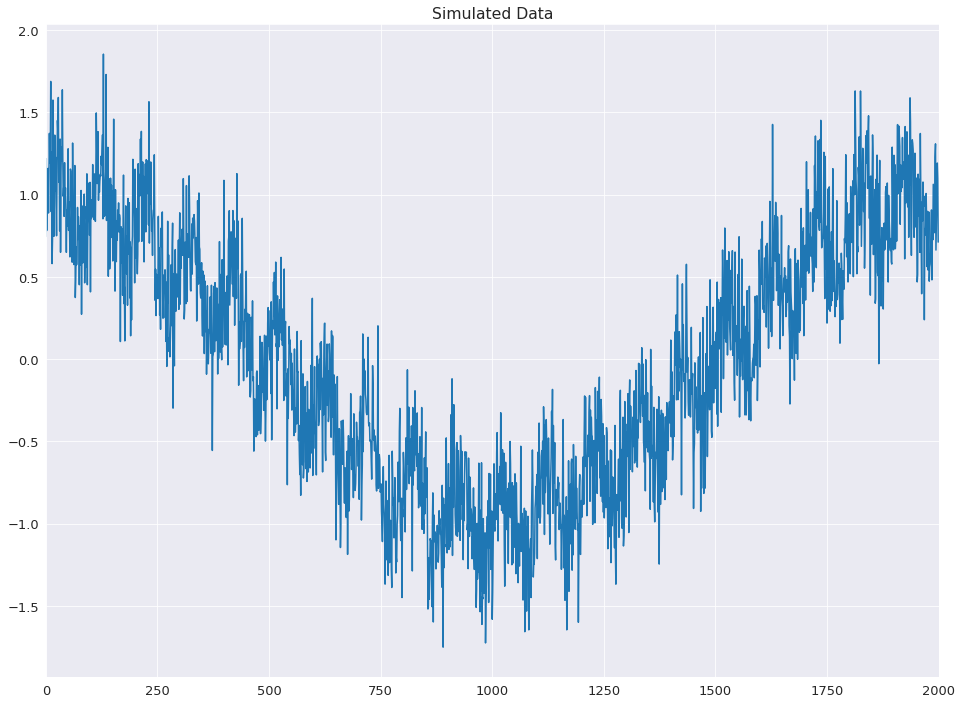

In [185]:
import numpy as np

rs = np.random.RandomState(0xA4FD94BC)
tau = 2000
t = np.arange(tau)
period = int(0.05 * tau)
seasonal = period + ((period % 2) == 0)  # Ensure odd
e = 0.25 * rs.standard_normal(tau)
y = np.cos(t / tau * 2 * np.pi) + 0.25 * np.sin(t / period * 2 * np.pi) + e
plt.plot(y)
plt.title("Simulated Data")
xlim = plt.gca().set_xlim(0, tau)

1 loop, best of 5: 614 ms per loop


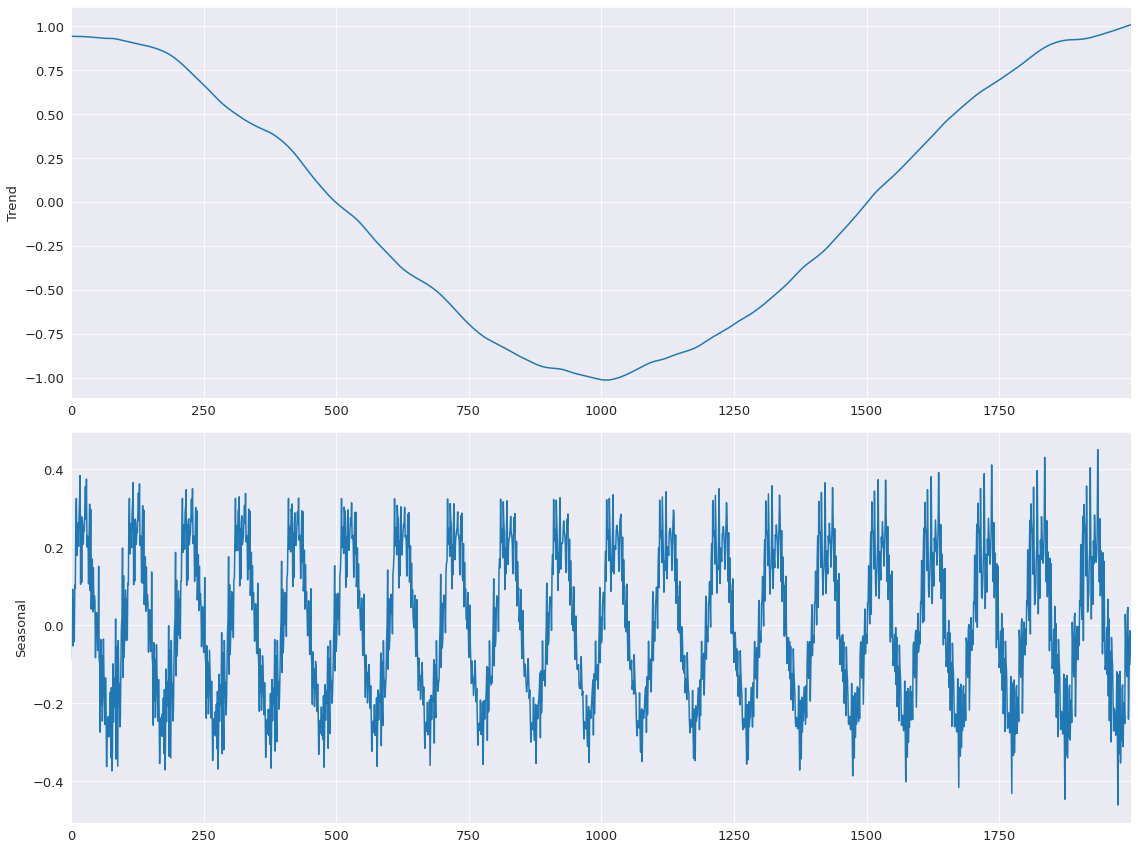

In [186]:
mod = STL(y, period=period, seasonal=seasonal)
%timeit mod.fit()
res = mod.fit()
fig = res.plot(observed=False, resid=False)

10 loops, best of 5: 42.2 ms per loop


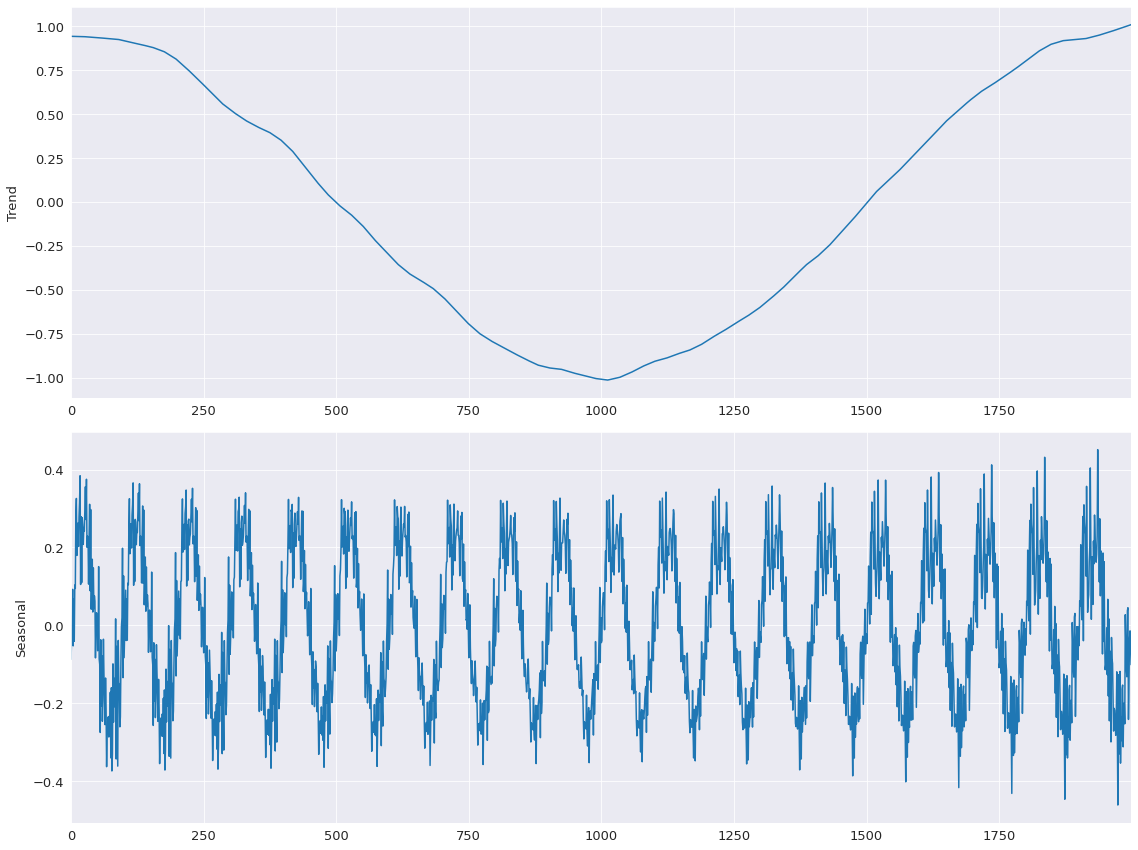

In [187]:
low_pass_jump = seasonal_jump = int(0.15 * (period + 1))
trend_jump = int(0.15 * 1.5 * (period + 1))
mod = STL(
    y,
    period=period,
    seasonal=seasonal,
    seasonal_jump=seasonal_jump,
    trend_jump=trend_jump,
    low_pass_jump=low_pass_jump,
)
%timeit mod.fit()
res = mod.fit()
fig = res.plot(observed=False, resid=False)

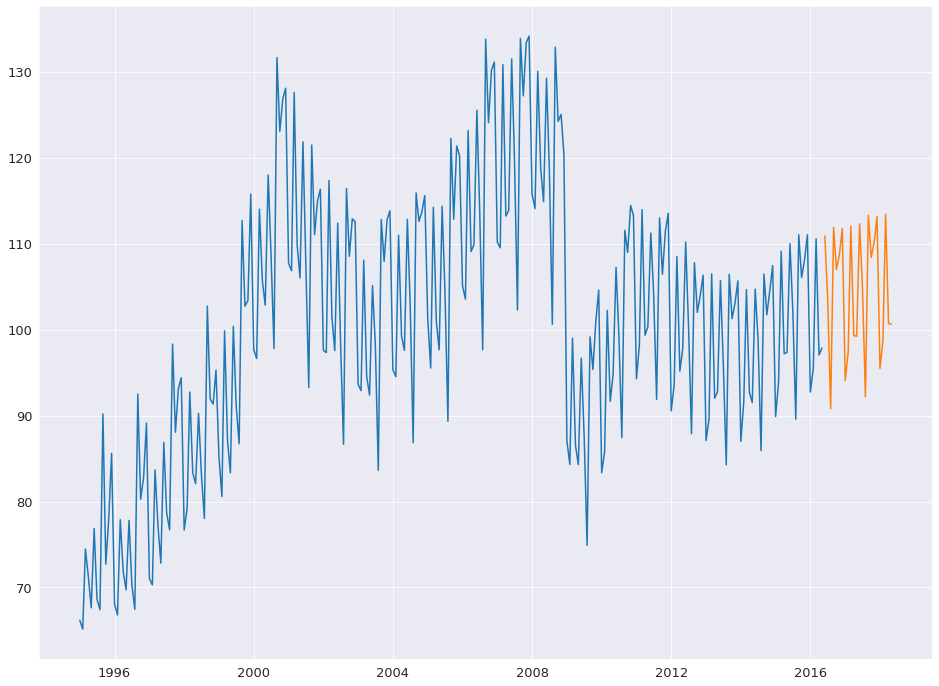

In [188]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

elec_equip.index.freq = elec_equip.index.inferred_freq
stlf = STLForecast(elec_equip, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(elec_equip)
plt.plot(forecast)
plt.show()

In [189]:
print(stlf_res.summary())

                    STL Decomposition and SARIMAX Results                     
Dep. Variable:                      y   No. Observations:                  257
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -522.434
Date:                Mon, 23 May 2022   AIC                           1050.868
Time:                        16:34:37   BIC                           1061.504
Sample:                    01-01-1995   HQIC                          1055.146
                         - 05-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1171      0.118      0.995      0.320      -0.113       0.348
ar.L1         -0.0435      0.049     -0.880      0.379      -0.140       0.053
sigma2         3.4682      0.188     18.406      0.0

# Linear Regression

In [193]:
import numpy as np

df['Time_index'] = np.arange(len(df.index))

df.head()

,Sales,Time,Time_index
Time,,,
1995-01,10817,0,0
1995-02,8916,1,1
1995-03,9697,2,2
1995-04,10314,3,3
1995-05,9775,4,4


In [201]:
df['Lag_1'] = df['Sales'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Time,,
1995-01,NaN,NaN
1995-02,NaN,10817.0
1995-03,NaN,8916.0
1995-04,NaN,9697.0
1995-05,NaN,10314.0


In [204]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [205]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)


In [206]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [207]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.051e+06
Date:                Mon, 23 May 2022   Prob (F-statistic):          1.97e-239
Time:                        17:25:42   Log-Likelihood:                -146.21
No. Observations:                 100   AIC:                             298.4
Df Residuals:                      97   BIC:                             306.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5575      0.312      1.788      0.0

In [208]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [0.55746504 0.1555593  9.99876708]
R2:  0.9999880264201007


In [209]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [210]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     246.4
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.44e-28
Time:                        17:32:06   Log-Likelihood:                -35.673
No. Observations:                  50   AIC:                             79.35
Df Residuals:                      46   BIC:                             86.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5169      0.027     19.096      0.0

In [211]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.51686274  0.45810728 -0.01908681  4.81659224]
Standard errors:  [0.02706619 0.10640039 0.00237643 0.17549822]
Predicted values:  [ 4.33942198  4.80694575  5.23823511  5.60832362  5.90125509  6.11270517
  6.25069177  6.33425779  6.39034242  6.44935507  6.54017925  6.68542704
  6.897724    7.17763484  7.51357065  7.88369289  8.25950141  8.61051698
  8.90928889  9.13590507  9.28126353  9.34856787  9.35280086  9.31826286
  9.27457932  9.25183342  9.27562347  9.36285718  9.51897379  9.73705041
  9.99893941 10.27825006 10.54468443 10.76901526 10.9278879  11.00765745
 11.00663054 10.93534357 10.8148316  10.67317236 10.54087312 10.44585849
 10.40888245 10.44011852 10.53748833 10.68700301 10.86506161 11.0423286
 11.18855366 11.27754168]


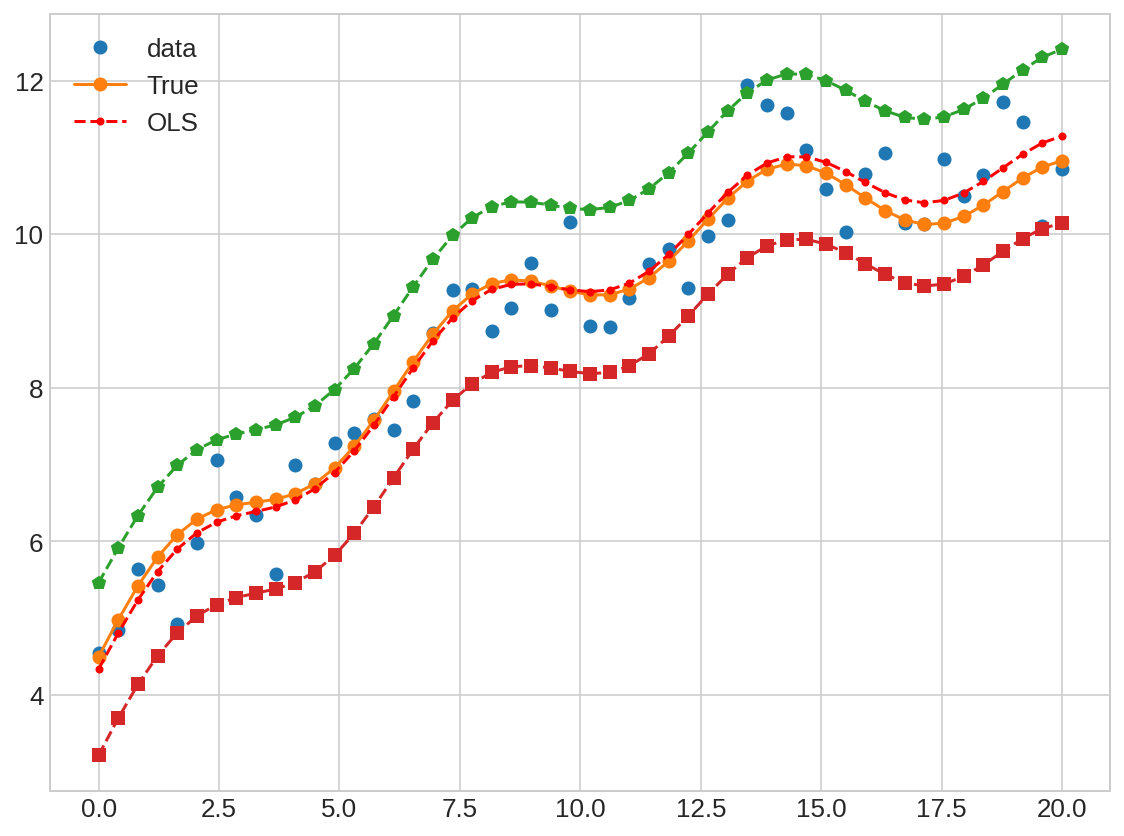

In [216]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "o-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "p--")
ax.plot(x, iv_l, "s--")
ax.legend(loc="best")